In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

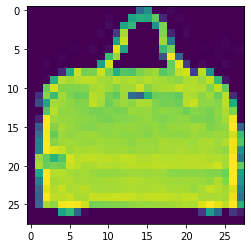

In [9]:
plt.figure()
plt.imshow(np.squeeze(train_images[220]))

In [10]:
train_labels[220]

8

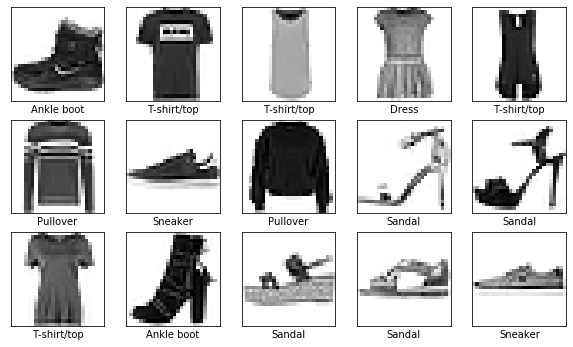

In [11]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
#reshape
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [51]:
#Standardization
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [14]:
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )

W0615 08:54:41.834311 140022840350528 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [16]:
conv3 = layers.Conv2D(128, (3,3), activation='relu')

In [17]:
max_pool_1 = layers.MaxPooling2D((2,2))

In [18]:
max_pool_2 = layers.MaxPooling2D((2,2))

In [19]:
max_pool_3 = layers.MaxPooling2D((2,2))

In [20]:
flat_layer = layers.Flatten()

In [21]:
drop_1 = keras.layers.Dropout(0.5)
drop_2 = keras.layers.Dropout(0.5)
drop_3 = keras.layers.Dropout(0.5)

In [22]:
fc = layers.Dense(128, activation='relu')

In [23]:
output = layers.Dense(10, 'softmax')

In [24]:
new_model = models.Sequential()

new_model.add(conv1)
new_model.add(conv2)
new_model.add(max_pool_2)
new_model.add(drop_2)
new_model.add(conv3)
new_model.add(max_pool_3)
new_model.add(drop_3)
new_model.add(flat_layer)
new_model.add(fc)
new_model.add(output)

In [26]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)         0

In [28]:
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
new_model.fit(train_images_norm, train_labels, epochs=10, batch_size=512, shuffle=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 38s 708us/sample - loss: 0.7743 - acc: 0.7129 - val_loss: 0.4893 - val_acc: 0.8192
Epoch 2/10
54000/54000 [==============================] - 38s 696us/sample - loss: 0.4662 - acc: 0.8294 - val_loss: 0.3891 - val_acc: 0.8622
Epoch 3/10
54000/54000 [==============================] - 38s 706us/sample - loss: 0.3956 - acc: 0.8570 - val_loss: 0.3450 - val_acc: 0.8823
Epoch 4/10
54000/54000 [==============================] - 41s 756us/sample - loss: 0.3537 - acc: 0.8726 - val_loss: 0.3068 - val_acc: 0.8908
Epoch 5/10
54000/54000 [==============================] - 36s 669us/sample - loss: 0.3239 - acc: 0.8831 - val_loss: 0.2874 - val_acc: 0.8983
Epoch 6/10
54000/54000 [==============================] - 36s 671us/sample - loss: 0.3054 - acc: 0.8888 - val_loss: 0.2733 - val_acc: 0.9025
Epoch 7/10
54000/54000 [==============================] - 36s 675us/sample - loss: 0.2880 - acc: 0.8958 -

In [30]:
test_loss, test_accuracy = new_model.evaluate(test_images_norm, test_labels)

10000/10000 [==============================] - 2s 229us/sample - loss: 0.2419 - acc: 0.9151


In [32]:
print(test_accuracy)

0.9151


In [33]:
print(test_loss)

0.24187830041646957


In [34]:
prediction = new_model.predict(test_images_norm)

In [35]:
prediction.shape

(10000, 10)

In [36]:
prediction[220]

array([9.8835630e-04, 5.0680131e-07, 2.6962583e-04, 1.5791347e-05,
       2.6044521e-05, 3.2549365e-06, 4.6839495e-04, 1.5314552e-05,
       9.9820399e-01, 8.7249873e-06], dtype=float32)

In [48]:
np.argmax(prediction[220])

8

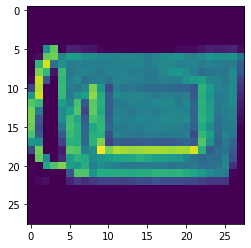

In [52]:
plt.figure()
plt.imshow(np.squeeze(test_images_norm[220]))